# 1.1 Importing the data

In [5]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas_ta as ta
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
start = "2018-01-01"
end=dt.date.today()
NEE = yf.download('NEE',start,end)
JKS = yf.download('JKS',start,end)
FSLR = yf.download('FSLR',start,end)
XOM = yf.download('XOM', start, end)
COP = yf.download('COP', start, end)
SPY = yf.download('SPY', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 1.2 Exploratory Data Analysis

In [7]:
data = yf.download("PLUG, BEP, NEE, JKS, XOM", delimiter=',', start="2018-01-01", end=dt.date.today())
ticker = 'PLUG BEP NEE JKS XOM'
data

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  Close  \
                  BEP        JKS        NEE       PLUG        XOM        BEP   
Date                                                                           
2018-01-02  15.358138  25.059999  35.021721   2.420000  65.905388  18.609114   
2018-01-03  15.274574  24.330000  34.278786   2.420000  67.199776  18.507860   
2018-01-04  15.076662  24.190001  34.102661   2.400000  67.292809  18.268051   
2018-01-05  15.155828  24.230000  34.258472   2.360000  67.238548  18.363976   
2018-01-08  15.067867  24.129999  34.540737   2.330000  67.540825  18.257395   
...               ...        ...        ...        ...        ...        ...   
2022-08-19  38.740002  58.970001  89.709999  26.820000  94.080002  38.740002   
2022-08-22  38.650002  56.400002  88.540001  26.379999  94.010002  38.650002   
2022-08-23  38.939999  57.360001  87.980003  26.120001  98.000000  38.939999   
2022-08-24  38.930000  57.689999  88.709999  27.520000  98.580002  38.930000   
2022-08-25  38.639999  58.650002  89.389999  30.000000  99.089996  38.639999   

                                                        ...       Open  \
                  JKS        NEE       PLUG        XOM  ...        BEP   
Date                                                    ...              
2018-01-02  25.059999  38.772499   2.420000  85.029999  ...  18.699707   
2018-01-03  24.330000  37.950001   2.420000  86.699997  ...  18.694378   
2018-01-04  24.190001  37.755001   2.400000  86.820000  ...  18.651745   
2018-01-05  24.230000  37.927502   2.360000  86.750000  ...  18.363976   
2018-01-08  24.129999  38.240002   2.330000  87.139999  ...  18.385292   
...               ...        ...        ...        ...  ...        ...   
2022-08-19  58.970001  89.709999  26.820000  94.080002  ...  38.930000   
2022-08-22  56.400002  88.540001  26.379999  94.010002  ...  38.299999   
2022-08-23  57.360001  87.980003  26.120001  98.000000  ...  38.970001   
2022-08-24  57.689999  88.709999  27.520000  98.580002  ...  38.959999   
2022-08-25  58.650002  89.389999  30.000000  99.089996  ...  39.040001   

                                                        Volume           \
                  JKS        NEE       PLUG        XOM     BEP      JKS   
Date                                                                      
2018-01-02  24.120001  39.107498   2.380000  83.820000  125163   396600   
2018-01-03  25.209999  38.522499   2.400000  85.160004  141300   534000   
2018-01-04  24.209999  37.877499   2.400000  86.790001  158377   422800   
2018-01-05  24.299999  37.845001   2.430000  86.750000  157814   328500   
2018-01-08  24.250000  37.927502   2.350000  86.699997  105084   358300   
...               ...        ...        ...        ...     ...      ...   
2022-08-19  60.410000  90.110001  27.240000  94.160004   81700  3011900   
2022-08-22  57.090000  88.930000  25.700001  93.419998  117400  1669100   
2022-08-23  58.150002  88.610001  26.559999  95.550003  134100  1181100   
2022-08-24  57.189999  88.150002  26.559999  98.010002  128000  1002300   
2022-08-25  59.799999  89.010002  31.170000  98.919998  268843  1207684   

                                          
                 NEE      PLUG       XOM  
Date                                      
2018-01-02   4766400   2845600  11469300  
2018-01-03  11008000   2331100  13957700  
2018-01-04  13629200   2458000  10863000  
2018-01-05  10318000   3217600  11047600  
2018-01-08   7225200   3720700  10927100  
...              ...       ...       ...  
2022-08-19   5542800  19242900  16126200  
2022-08-22   5783400  15119300  16019900  
2022-08-23   3473600  14382900  23764700  
2022-08-24   5669200  17741600  17050300  
2022-08-25   5089546  59927087  14999041  

[1171 rows x 30 columns]

In [8]:
just_closing_prices = pd.DataFrame(data[['Adj Close']])
just_closing_prices

Adj Close                                            
                  BEP        JKS        NEE       PLUG        XOM
Date                                                             
2018-01-02  15.358138  25.059999  35.021721   2.420000  65.905388
2018-01-03  15.274574  24.330000  34.278786   2.420000  67.199776
2018-01-04  15.076662  24.190001  34.102661   2.400000  67.292809
2018-01-05  15.155828  24.230000  34.258472   2.360000  67.238548
2018-01-08  15.067867  24.129999  34.540737   2.330000  67.540825
...               ...        ...        ...        ...        ...
2022-08-19  38.740002  58.970001  89.709999  26.820000  94.080002
2022-08-22  38.650002  56.400002  88.540001  26.379999  94.010002
2022-08-23  38.939999  57.360001  87.980003  26.120001  98.000000
2022-08-24  38.930000  57.689999  88.709999  27.520000  98.580002
2022-08-25  38.639999  58.650002  89.389999  30.000000  99.089996

[1171 rows x 5 columns]

In [194]:
daily_pct_change = just_closing_prices.pct_change()
daily_pct_change[:5]

Adj Close                                        
                 BEP       JKS       NEE      PLUG       XOM
Date                                                        
2018-01-02       NaN       NaN       NaN       NaN       NaN
2018-01-03 -0.005441 -0.029130 -0.021214  0.000000  0.019640
2018-01-04 -0.012957 -0.005754 -0.005138 -0.008264  0.001384
2018-01-05  0.005251  0.001654  0.004569 -0.016667 -0.000806
2018-01-08 -0.005804 -0.004127  0.008239 -0.012712  0.004495

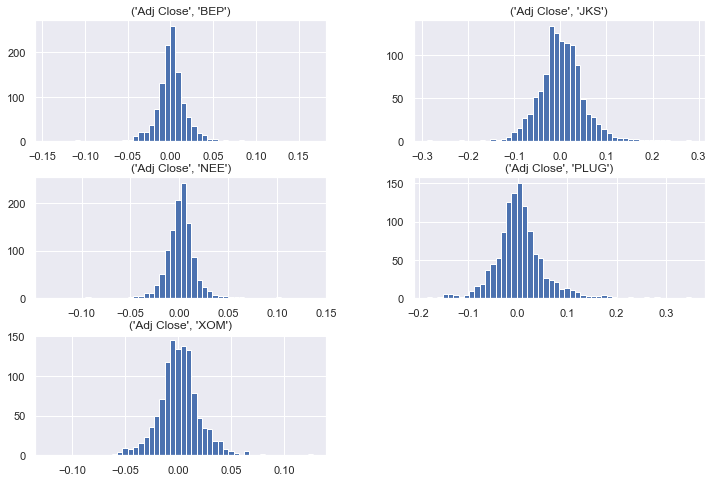

In [195]:
daily_pct_change.hist(bins=50, figsize=(12,8));

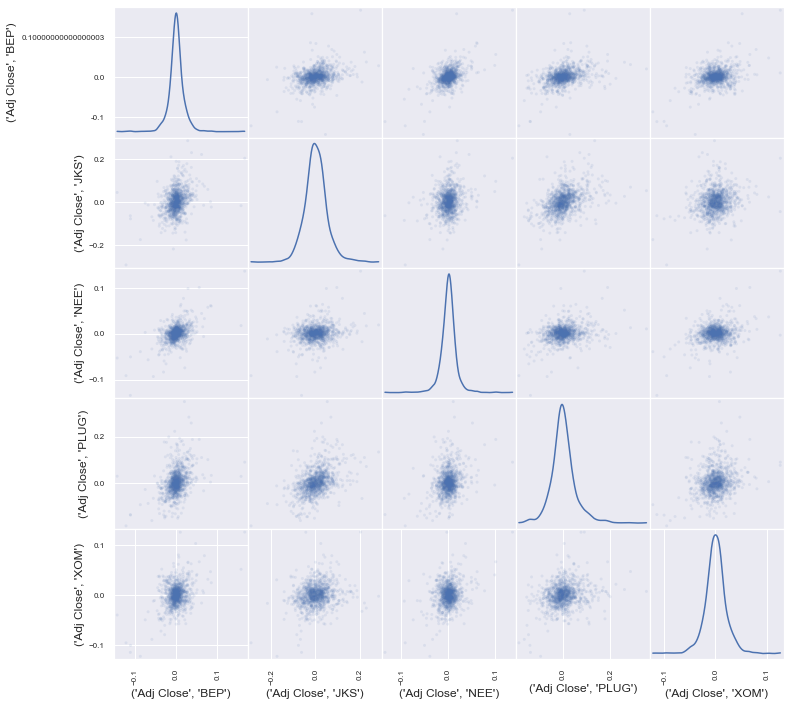

In [196]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
                         figsize=(12,12));

# 1.3 cumulative daily returns

In [197]:
SPY= yf.download('SPY', start="2018-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [198]:
NEE = yf.download('NEE', start="2018-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [199]:
PLUG =  yf.download('PLUG', start="2018-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [200]:
JKS =  yf.download('JKS', start="2018-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [201]:
spy_closing = pd.DataFrame(SPY[['Adj Close']])

In [210]:
nee_closing = pd.DataFrame(NEE[['Adj Close']])

In [211]:
jks_closing = pd.DataFrame(JKS[['Adj Close']])

In [212]:
plug_closing = pd.DataFrame(PLUG[['Adj Close']])

In [213]:
spy= spy_closing.pct_change().fillna(0)


In [214]:
nee = nee_closing.pct_change().fillna(0)

In [215]:
jks= jks_closing.pct_change().fillna(0)

In [216]:
plug= plug_closing.pct_change().fillna(0)

In [217]:
spy.rename(columns={'Adj Close': 'SP500'}, inplace=True)

In [218]:
nee.rename(columns={'Adj Close': 'nee'}, inplace=True)

In [219]:
jks.rename(columns={'Adj Close': 'jks'}, inplace=True)

In [220]:
plug.rename(columns={'Adj Close': 'plug'}, inplace=True)

In [221]:
dpc_all = pd.concat([spy, nee, plug, jks] , axis=1)


dpc_all[:5]

,SP500,nee,plug,jks
Date,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.006325,-0.021214,0.000000,-0.029130
2018-01-04,0.004215,-0.005138,-0.008264,-0.005754
2018-01-05,0.006664,0.004569,-0.016667,0.001654
2018-01-08,0.001829,0.008239,-0.012712,-0.004127


In [222]:
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

,SP500,nee,plug,jks
Date,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000
2018-01-03,1.006325,0.978786,1.000000,0.970870
2018-01-04,1.010567,0.973757,0.991736,0.965283
2018-01-05,1.017301,0.978206,0.975207,0.966879
2018-01-08,1.019161,0.986266,0.962810,0.962889


In [223]:
dpc_corrs = dpc_all.corr()
dpc_corrs

,SP500,nee,plug,jks
SP500,1.000000,0.570068,0.434322,0.379902
nee,0.570068,1.000000,0.259043,0.210654
plug,0.434322,0.259043,1.000000,0.428791
jks,0.379902,0.210654,0.428791,1.000000


In [224]:
dpc_corrs['SP500']

SP500    1.000000
nee      0.570068
plug     0.434322
jks      0.379902
Name: SP500, dtype: float64

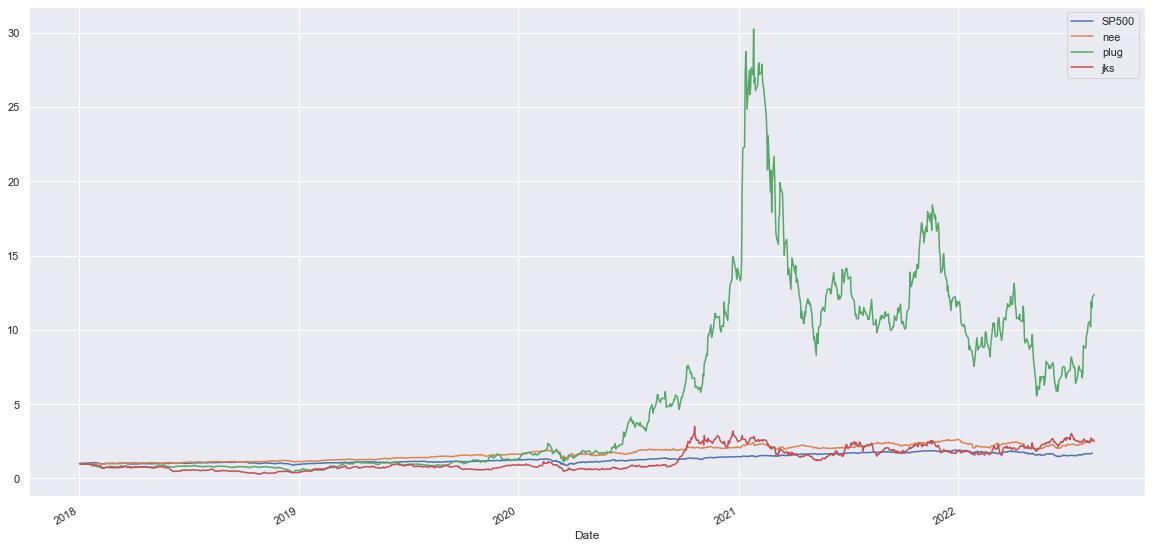

In [225]:
_ = cdr_all.plot(figsize=(20,10));

# REGRESSION MODELLING

# 2 Pairs trading linear regression- SPY and NEE

# with 5 features

In [9]:
SPY = yf.download('SPY', start="2018-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [10]:
NEE = yf.download('NEE', start="2018-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [11]:
nee =NEE [['Adj Close']]

In [12]:
start = "2018-01-01"
end=dt.date.today()

In [13]:
spy =SPY [['Adj Close']]
spy['return'] = np.log(spy / spy.shift(1))
spy['direction'] = np.where(spy['return'] > 0, 1, 0)
spy.dropna(inplace=True)
spy.tail()

<ipython-input-13-84239da9c7da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['return'] = np.log(spy / spy.shift(1))
<ipython-input-13-84239da9c7da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['direction'] = np.where(spy['return'] > 0, 1, 0)
<ipython-input-13-84239da9c7da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,Adj Close,return,direction
Date,,,
2022-08-19,422.140015,-0.013529,0
2022-08-22,413.350006,-0.021042,0
2022-08-23,412.350006,-0.002422,0
2022-08-24,413.670013,0.003196,1
2022-08-25,419.510010,0.014019,1


In [14]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    spy[col] = spy['return'].shift(lag)
    cols.append(col)
spy.dropna(inplace=True)

<ipython-input-14-aadbd2d54fe8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy[col] = spy['return'].shift(lag)
<ipython-input-14-aadbd2d54fe8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy.dropna(inplace=True)


In [15]:
cols = list(spy.columns)
cols = cols[3:]
cols


['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [16]:
spy.replace([np.inf, -np.inf], np.nan, inplace=True)
nee.replace([np.inf, -np.inf], np.nan, inplace=True)

X = spy[cols]
y = nee.pct_change().dropna()


X.dropna()

C:\Users\Latika\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,
2018-01-10,0.002261,0.001827,0.006642,0.004206,0.006305
2018-01-11,-0.001531,0.002261,0.001827,0.006642,0.004206
2018-01-12,0.007270,-0.001531,0.002261,0.001827,0.006642
2018-01-16,0.006498,0.007270,-0.001531,0.002261,0.001827
2018-01-17,-0.003424,0.006498,0.007270,-0.001531,0.002261
...,...,...,...,...,...
2022-08-19,0.002902,-0.007123,0.001957,0.004112,0.016787
2022-08-22,-0.013529,0.002902,-0.007123,0.001957,0.004112
2022-08-23,-0.021042,-0.013529,0.002902,-0.007123,0.001957


In [22]:
X = X.head(1156)

In [23]:
y.dropna()

,Adj Close
Date,
2018-01-03,-0.021214
2018-01-04,-0.005138
2018-01-05,0.004569
2018-01-08,0.008239
2018-01-09,-0.007322
...,...
2022-08-01,0.009705
2022-08-02,0.004220
2022-08-03,0.009221


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

X_train = np.nan_to_num(X_train)

X_test = np.nan_to_num(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[-0.02196805 -0.13842451  0.03177709 -0.02138677  0.69740681]]
Mean Absolute Error: 0.009294072445417068
Coefficient of Determination: 0.4289156777199604


In [27]:
### the value of intercept is 0.0007, which means that the model predicts the response 0.0005 when x is zero
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [0.00075026]
slope: [[-0.02196805 -0.13842451  0.03177709 -0.02138677  0.69740681]]


# Classification models

# 3.1 Random Classifier

In [417]:
start = "2018-01-01"
end=dt.date.today()
NEE = yf.download('NEE',start,end)

[*********************100%***********************]  1 of 1 completed


In [418]:
pd.options.mode.chained_assignment = None  # default='warn'

In [419]:
start = "2018-01-01"
end=dt.date.today()
NEE = yf.download('NEE',start,end)

nee =NEE [['Adj Close']]

nee['return'] = np.log(nee / nee.shift(1))
nee['direction'] = np.where(nee['return'] > 0, 1, 0)
nee.dropna(inplace=True)
nee.tail()

[*********************100%***********************]  1 of 1 completed


,Adj Close,return,direction
Date,,,
2022-08-15,91.000000,0.005841,1
2022-08-16,90.529999,-0.005178,0
2022-08-17,90.199997,-0.003652,0
2022-08-18,90.239998,0.000443,1
2022-08-19,89.709999,-0.005891,0


In [420]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    nee[col] = nee['return'].shift(lag)
    cols.append(col)
nee.dropna(inplace=True)

In [421]:
import ta
from ta.volatility import BollingerBands

indicator_bb = BollingerBands(close=nee['Adj Close'], window=20, window_dev=2)
nee['bb_bbm'] = indicator_bb.bollinger_mavg()
nee['bb_bbh'] = indicator_bb.bollinger_hband()
nee['bb_bbl'] = indicator_bb.bollinger_lband()

<AxesSubplot:xlabel='Date'>

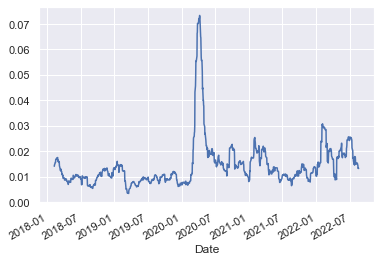

In [422]:
from ta.trend import MACD

indicator_macd = MACD(close = nee['Adj Close'], window_slow = 26, window_fast = 12, window_sign = 9, fillna = False)
nee['macd'] = indicator_macd.macd()
nee['macd_diff'] = indicator_macd.macd_diff()
nee['macd_signal'] = indicator_macd.macd_signal()

nee['momentum'] = nee['return'].rolling(5).mean().shift(1)
nee['volatility'] = nee['return'].rolling(20).std().shift(1)


nee['volatility'].plot()

In [423]:
cols = list(nee.columns)
cols = cols[3:]
cols

['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'bb_bbm',
 'bb_bbh',
 'bb_bbl',
 'macd',
 'macd_diff',
 'macd_signal',
 'momentum',
 'volatility']

In [434]:

nee.replace([np.inf, -np.inf], np.nan, inplace=True)

X = nee[cols]
y = nee['direction']


X.dropna()
y.dropna()



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


split = int(0.7*len(nee))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.7)


X_train = np.nan_to_num(X_train)

X_test = np.nan_to_num(X_test)


clf = RandomForestClassifier(random_state=5)
model = clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  58.45272206303726


In [425]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(y_test, model.predict(X_test))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 100.00%
Test Accuracy: 55.97%


              precision    recall  f1-score   support

           0       0.53      0.38      0.44       372
           1       0.58      0.71      0.64       441

    accuracy                           0.56       813
   macro avg       0.55      0.55      0.54       813
weighted avg       0.55      0.56      0.55       813


Accuracy
0.5596555965559655


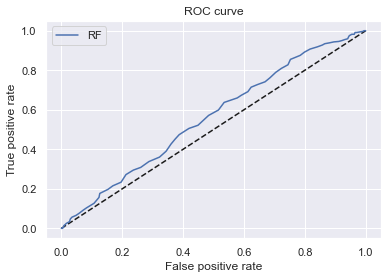

In [426]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Performance Metrics
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [427]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[140 232]
 [126 315]]


# using grid searchCV

In [300]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10,40, 50, 60, 100],
    'max_depth': [4, 5, 6, 10],
    'max_features': [4,6,8,10]
    }
]

clf2 = RandomForestClassifier(random_state=5)

grid_search = GridSearchCV(clf2, param_grid, cv = 5, scoring = 'accuracy', verbose = 3)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ...max_depth=4, max_features=4, n_estimators=10; total time=   0.0s
[CV 2/5] END ...max_depth=4, max_features=4, n_estimators=10; total time=   0.0s
[CV 3/5] END ...max_depth=4, max_features=4, n_estimators=10; total time=   0.0s
[CV 4/5] END ...max_depth=4, max_features=4, n_estimators=10; total time=   0.0s
[CV 5/5] END ...max_depth=4, max_features=4, n_estimators=10; total time=   0.0s
[CV 1/5] END ...max_depth=4, max_features=4, n_estimators=40; total time=   0.0s
[CV 2/5] END ...max_depth=4, max_features=4, n_estimators=40; total time=   0.0s
[CV 3/5] END ...max_depth=4, max_features=4, n_estimators=40; total time=   0.0s
[CV 4/5] END ...max_depth=4, max_features=4, n_estimators=40; total time=   0.0s
[CV 5/5] END ...max_depth=4, max_features=4, n_estimators=40; total time=   0.0s
[CV 1/5] END ...max_depth=4, max_features=4, n_estimators=50; total time=   0.0s
[CV 2/5] END ...max_depth=4, max_features=4, n_

[CV 2/5] END ...max_depth=5, max_features=4, n_estimators=40; total time=   0.0s
[CV 3/5] END ...max_depth=5, max_features=4, n_estimators=40; total time=   0.0s
[CV 4/5] END ...max_depth=5, max_features=4, n_estimators=40; total time=   0.0s
[CV 5/5] END ...max_depth=5, max_features=4, n_estimators=40; total time=   0.0s
[CV 1/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 2/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 3/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 4/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 5/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 1/5] END ...max_depth=5, max_features=4, n_estimators=60; total time=   0.0s
[CV 2/5] END ...max_depth=5, max_features=4, n_estimators=60; total time=   0.0s
[CV 3/5] END ...max_depth=5, max_features=4, n_estimators=60; total time=   0.0s
[CV 4/5] END ...max_depth=5,

[CV 1/5] END ...max_depth=6, max_features=4, n_estimators=50; total time=   0.0s
[CV 2/5] END ...max_depth=6, max_features=4, n_estimators=50; total time=   0.0s
[CV 3/5] END ...max_depth=6, max_features=4, n_estimators=50; total time=   0.0s
[CV 4/5] END ...max_depth=6, max_features=4, n_estimators=50; total time=   0.0s
[CV 5/5] END ...max_depth=6, max_features=4, n_estimators=50; total time=   0.0s
[CV 1/5] END ...max_depth=6, max_features=4, n_estimators=60; total time=   0.0s
[CV 2/5] END ...max_depth=6, max_features=4, n_estimators=60; total time=   0.0s
[CV 3/5] END ...max_depth=6, max_features=4, n_estimators=60; total time=   0.0s
[CV 4/5] END ...max_depth=6, max_features=4, n_estimators=60; total time=   0.0s
[CV 5/5] END ...max_depth=6, max_features=4, n_estimators=60; total time=   0.0s
[CV 1/5] END ..max_depth=6, max_features=4, n_estimators=100; total time=   0.1s
[CV 2/5] END ..max_depth=6, max_features=4, n_estimators=100; total time=   0.1s
[CV 3/5] END ..max_depth=6, 

[CV 3/5] END ..max_depth=10, max_features=4, n_estimators=50; total time=   0.0s
[CV 4/5] END ..max_depth=10, max_features=4, n_estimators=50; total time=   0.0s
[CV 5/5] END ..max_depth=10, max_features=4, n_estimators=50; total time=   0.0s
[CV 1/5] END ..max_depth=10, max_features=4, n_estimators=60; total time=   0.0s
[CV 2/5] END ..max_depth=10, max_features=4, n_estimators=60; total time=   0.0s
[CV 3/5] END ..max_depth=10, max_features=4, n_estimators=60; total time=   0.0s
[CV 4/5] END ..max_depth=10, max_features=4, n_estimators=60; total time=   0.0s
[CV 5/5] END ..max_depth=10, max_features=4, n_estimators=60; total time=   0.0s
[CV 1/5] END .max_depth=10, max_features=4, n_estimators=100; total time=   0.1s
[CV 2/5] END .max_depth=10, max_features=4, n_estimators=100; total time=   0.1s
[CV 3/5] END .max_depth=10, max_features=4, n_estimators=100; total time=   0.1s
[CV 4/5] END .max_depth=10, max_features=4, n_estimators=100; total time=   0.1s
[CV 5/5] END .max_depth=10, 

{'max_depth': 6, 'max_features': 6, 'n_estimators': 10}

In [301]:
clf_opt = RandomForestClassifier(max_depth = 6, max_features = 6, n_estimators = 10,random_state=5)

model = clf_opt.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  60.91954022988506


In [302]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 78  83]
 [ 53 134]]


# using lightgbm

In [303]:
import lightgbm as lgb
params = {'learning_rate': 0.01, 
          'max_depth': 12, 
          'boosting': 'gbdt',
          'num_leaves': 12,
          'objective': 'binary', 
          'metric': ['auc', 'binary_logloss'],
          'seed': 33}


model = lgb.train(params, train_set=lgb.Dataset(X_train, label=y_train), num_boost_round=5000,
                  valid_sets=[lgb.Dataset(X_train, label=y_train), lgb.Dataset(X_test, label=y_test)],
                  verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Info] Number of positive: 451, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 809, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557478 -> initscore=0.230934
[LightGBM] [Info] Start training from score 0.230934
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.837373	valid_0's binary_logloss: 0.597104	valid_1's auc: 0.549739	valid_1's binary_logloss: 0.692301
Early stopping, best iteration is:
[23]	valid_0's auc: 0.75856	valid_0's binary_logloss: 0.661495	valid_1's auc: 0.562328	valid_1's binary_logloss: 0.687902


In [304]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid = [
    {'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2,4, 6, 10],
    'boosting': ['gbdt'],
    'num_leaves': [6,8,16, 32],
    'objective' : ['binary'],
    'seed': [33],
    'metric': ['auc','binary_logloss' ],
    'n_estimators': [50, 100] 
    }
]

clf = LGBMClassifier()

gsearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 5, verbose = 3)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_dep

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=auc, n_estimators=100, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=auc, n_estimators=100, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=auc, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=auc, n_estimators=100, num_leaves=32, object

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=2, metric=binary_logloss

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=auc, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=auc, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=auc, n_estimators=100, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=auc, n_estimators=100, num_leaves=6, objective=

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=4, metric=binary_logloss

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=50, num_leaves=6, objective=bina

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=100, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=auc, n_estimators=100, num_leaves=32, object

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=6, metric=binary_logloss

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=auc, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=auc, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=auc, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=auc, n_estimators=50, num_leaves=32, object

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.01, max_depth=10, metric=binary_loglo

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=bina

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=100, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=100, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=auc, n_estimators=100, num_leaves=32, object

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=2, metric=binary_logloss

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=auc, n_estimators=100, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=auc, n_estimators=100, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=auc, n_estimators=100, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=auc, n_estimators=100, num_leaves=6, objective=

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=binary_logloss, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=binary_logloss, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=4, metric=binary_logloss

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=auc, n_estimators=50, num_leaves=16, objective=

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.05, max_depth=6, metric=binary_logloss

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=auc, n_estimators=50, num_leaves=32, object

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=binary_loglos

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=binary_logloss, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.05, max_depth=10, metric=binary_logloss, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=auc, n_estimators=50, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=auc, n_estimators=50, nu

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=auc, n_estimators=100, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=auc, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=auc, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=auc, n_estimators=100, num_leaves=32, objective=

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=binary_logloss, n_estimators=100, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=2, metric=binary_logloss,

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=auc, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=auc, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=auc, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=auc, n_estimators=100, num_leaves=16, objective=bin

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=binary_logloss, n_estimators=100, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=binary_logloss, n_estimators=100, num_leaves=8, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=4, metric=binary_logloss, n_

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=auc, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=auc, n_estimators=100, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=auc, n_estimators=100, num_leaves=6, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=auc, n_estimators=100, num_leaves=6, objective=bina

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=binary_logloss, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=binary_logloss, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=binary_logloss, n_estimators=50, num_leaves=32, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=6, metric=binary_logloss, n_

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 1/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=auc, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=auc, n_estimators=50, num_leaves=16, objective=

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 2/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 3/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 4/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=binary_logloss, n_estimators=50, num_leaves=16, objective=binary, seed=33; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV 5/5] END boosting=gbdt, learning_rate=0.1, max_depth=10, metric=binary_logloss

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid=[{'boosting': ['gbdt'],
                          'learning_rate': [0.01, 0.05, 0.1],
                          'max_depth': [2, 4, 6, 10],
                          'metric': ['auc', 'binary_logloss'],
                          'n_estimators': [50, 100],
                          'num_leaves': [6, 8, 16, 32], 'objective': ['binary'],
                          'seed': [33]}],
             verbose=3)

In [305]:
clf_opt = LGBMClassifier(boosting='gbdt',
 learning_rate= 0.05,
 max_depth= 4,
 metric='auc',
 num_leaves= 8,
 objective= 'binary',
 seed= 33)

model = clf_opt.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  57.47126436781609


In [306]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(y_test, model.predict(X_test))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 80.59%
Test Accuracy: 57.47%


# Knearest neighbours

In [428]:
start = "2018-01-01"
end=dt.date.today()
NEE = yf.download('NEE',start,end)

[*********************100%***********************]  1 of 1 completed


In [429]:
start = "2018-01-01"
end=dt.date.today()
NEE = yf.download('NEE',start,end)

nee =NEE [['Adj Close']]

nee['return'] = np.log(nee / nee.shift(1))
nee['direction'] = np.where(nee['return'] > 0, 1, 0)
nee.dropna(inplace=True)
nee.tail()

lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    nee[col] = nee['return'].shift(lag)
    cols.append(col)
nee.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'bb_bbm',
 'bb_bbh',
 'bb_bbl',
 'macd',
 'macd_diff',
 'macd_signal',
 'momentum',
 'volatility']

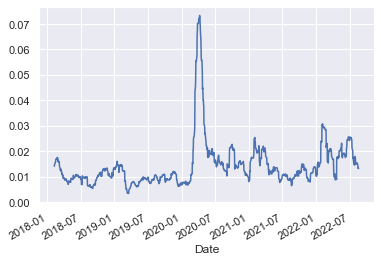

In [430]:
import ta
from ta.volatility import BollingerBands

indicator_bb = BollingerBands(close=nee['Adj Close'], window=20, window_dev=2)
nee['bb_bbm'] = indicator_bb.bollinger_mavg()
nee['bb_bbh'] = indicator_bb.bollinger_hband()
nee['bb_bbl'] = indicator_bb.bollinger_lband()

from ta.trend import MACD

indicator_macd = MACD(close = nee['Adj Close'], window_slow = 26, window_fast = 12, window_sign = 9, fillna = False)
nee['macd'] = indicator_macd.macd()
nee['macd_diff'] = indicator_macd.macd_diff()
nee['macd_signal'] = indicator_macd.macd_signal()

nee['momentum'] = nee['return'].rolling(5).mean().shift(1)
nee['volatility'] = nee['return'].rolling(20).std().shift(1)


nee['volatility'].plot()

cols = list(nee.columns)
cols = cols[3:]
cols


In [435]:
nee.replace([np.inf, -np.inf], np.nan, inplace=True)

X = nee[cols]
y = nee['direction']


X.dropna()
y.dropna()


Date
2018-01-10    0
2018-01-11    0
2018-01-12    0
2018-01-16    1
2018-01-17    1
             ..
2022-08-15    1
2022-08-16    0
2022-08-17    0
2022-08-18    1
2022-08-19    0
Name: direction, Length: 1161, dtype: int32

Classification accuracy:  0.5141451414514145


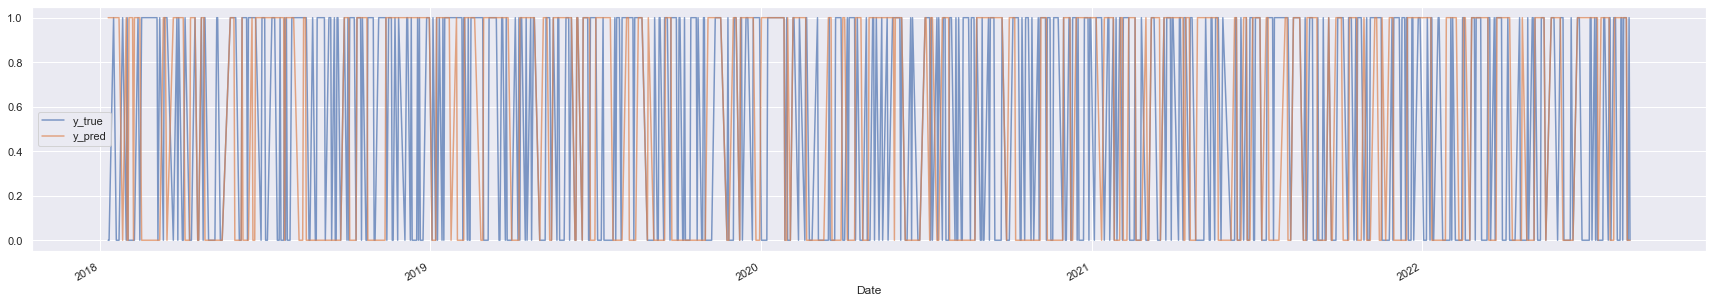

In [438]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = nee[cols]
y = nee['direction']


X.dropna()
y.dropna()

from sklearn.model_selection import cross_val_score


#split = int(0.7*len(nee))
#X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.7)



X_train = np.nan_to_num(X_train)

X_test = np.nan_to_num(X_test)

clf = KNeighborsClassifier(1)  

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(30, 5), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [312]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(y_test, model.predict(X_test))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 80.35%
Test Accuracy: 57.47%


In [390]:
y_pred.reshape(-1, 1)

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

# 3.2 Logistic Regression

In [313]:
start = "2018-01-01"
end=dt.date.today()
NEE = yf.download('NEE',start,end)

[*********************100%***********************]  1 of 1 completed


In [314]:
pd.options.mode.chained_assignment = None  # default='warn'

In [315]:
start = "2018-01-01"
end=dt.date.today()
NEE = yf.download('NEE',start,end)

nee =NEE [['Adj Close']]

nee['return'] = np.log(nee / nee.shift(1))
nee['direction'] = np.where(nee['return'] > 0, 1, 0)
nee.dropna(inplace=True)
nee.tail()

[*********************100%***********************]  1 of 1 completed


,Adj Close,return,direction
Date,,,
2022-08-09,88.919998,0.015870,1
2022-08-10,89.779999,0.009625,1
2022-08-11,89.430000,-0.003906,0
2022-08-12,90.470001,0.011562,1
2022-08-15,91.000000,0.005841,1


In [316]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    nee[col] = nee['return'].shift(lag)
    cols.append(col)
nee.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

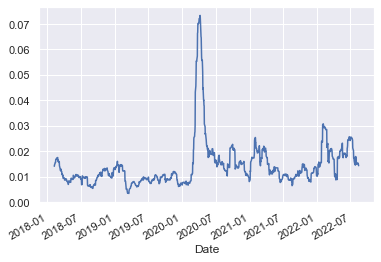

In [317]:
import ta
from ta.volatility import BollingerBands

indicator_bb = BollingerBands(close=nee['Adj Close'], window=20, window_dev=2)
nee['bb_bbm'] = indicator_bb.bollinger_mavg()
nee['bb_bbh'] = indicator_bb.bollinger_hband()
nee['bb_bbl'] = indicator_bb.bollinger_lband()
from ta.trend import MACD

indicator_macd = MACD(close = nee['Adj Close'], window_slow = 26, window_fast = 12, window_sign = 9, fillna = False)
nee['macd'] = indicator_macd.macd()
nee['macd_diff'] = indicator_macd.macd_diff()
nee['macd_signal'] = indicator_macd.macd_signal()

nee['momentum'] = nee['return'].rolling(5).mean().shift(1)
nee['volatility'] = nee['return'].rolling(20).std().shift(1)


nee['volatility'].plot()

In [318]:
cols = list(nee.columns)
cols = cols[3:]
cols

['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'bb_bbm',
 'bb_bbh',
 'bb_bbl',
 'macd',
 'macd_diff',
 'macd_signal',
 'momentum',
 'volatility']

In [439]:
nee.replace([np.inf, -np.inf], np.nan, inplace=True)

X = nee[cols]
y = nee['direction']


X.dropna()
y.dropna()


#split = int(0.7*len(nee))
#X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.7)


X_train = np.nan_to_num(X_train)

X_test = np.nan_to_num(X_test)


In [440]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

model = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=10000)

model = model.fit (X_train,y_train)

model.score(X_test, y_test)

0.5891758917589176

              precision    recall  f1-score   support

           0       0.65      0.31      0.42       161
           1       0.59      0.86      0.70       187

    accuracy                           0.60       348
   macro avg       0.62      0.58      0.56       348
weighted avg       0.62      0.60      0.57       348


Accuracy
0.603448275862069


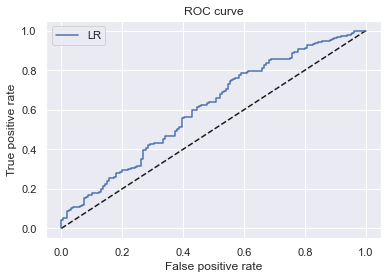

In [321]:
from sklearn.metrics import roc_curve

# Performance Metrics
y_pred_lr = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
print(classification_report(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# comparing models on ROC curve

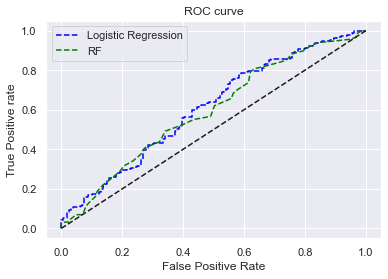

In [322]:
# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green', label='RF')

# title
plt.title('ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [2049]:
### The result is telling us that we have 47+158 correct predictions and 113+26 incorrect predictions
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 47 113]
 [ 28 158]]


In [2050]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.29      0.40       160
           1       0.58      0.85      0.69       186

    accuracy                           0.59       346
   macro avg       0.60      0.57      0.55       346
weighted avg       0.60      0.59      0.56       346



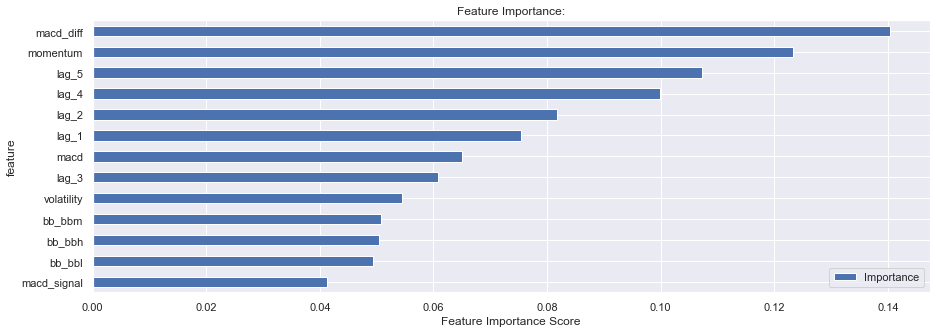

In [2051]:
# Feature Importance
title = 'Feature Importance:'
figsize = (15, 5)

feat_imp = pd.DataFrame({'Importance':clf_opt.feature_importances_})    
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp = feat_imp

feat_imp.sort_values(by='Importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=figsize)
plt.xlabel('Feature Importance Score')
plt.show()

# LSTM

In [399]:

import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [400]:
NEE = yf.download('NEE', start="2018-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [401]:
nee =NEE[['Adj Close']]

In [402]:
values = nee.values
training_data_len = math.ceil(len(values)* 0.8)

In [403]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

In [404]:
x_train = []
y_train = []

In [405]:
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [406]:
test_data = scaled_data[training_data_len-30: , : ]
x_test = []

y_test = values[training_data_len:]

for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [412]:
model = keras.Sequential()
model.add(layers.LSTM(units =100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(units =100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 25)                2525      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [413]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 4, epochs=3)

Epoch 1/3
226/226 [==============================] - 6s 15ms/step - loss: 0.0034
Epoch 2/3
226/226 [==============================] - 3s 15ms/step - loss: 0.0013
Epoch 3/3
226/226 [==============================] - 3s 15ms/step - loss: 9.5289e-04


In [414]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 8ms/step


In [415]:
math.sqrt(mean_squared_error(y_test,predictions))

2.4386675640478916

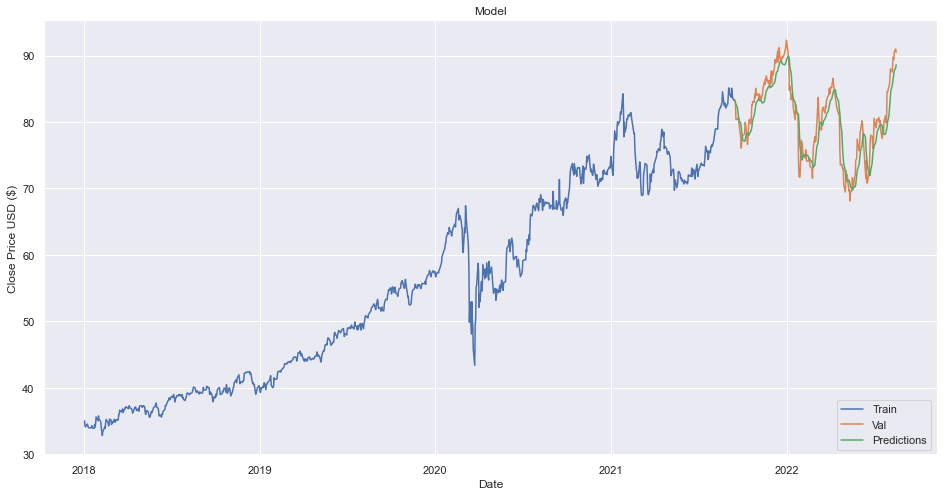

In [416]:
train = nee[:training_data_len]
validation = nee[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()